# Resize Lab

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img1 = "data/image/1_dev/converted/train/benign/82dcf0a8-cfb0-4446-97e4-a561893e334b.png"
img2 = "data/image/1_dev/converted/train/benign/2a458310-ed63-46ed-b18a-3e9790e2c182.png"
img3 = "data/image/1_dev/converted/train/malignant/7dcc12fd-88f0-4048-a6ab-5dd0bd836f08.png"
img4 = "data/image/1_dev/converted/train/benign/a2c62f57-14c7-4ac1-b763-b18797847af0.png"

In [16]:
def crop(img):
    if len(img.shape) == 3:
        img = img[:,:,0].squeeze()
    _, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)
    contours, _ = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_areas = [cv2.contourArea(contour) for contour in contours]
    idx = np.argmax(contour_areas)
    x,y,w,h = cv2.boundingRect(contours[idx])
    img = img[y:y+h, x:x+w]
    return img, [x,y,w,h]

(4560, 3088, 3)

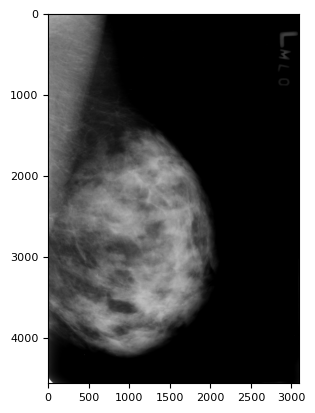

In [17]:
img = cv2.imread(img2)
img.shape
plt.imshow(img)
img_cropped, dim = crop(img)


[0, 0, 2114, 4560]


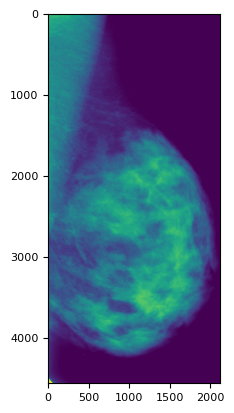

In [18]:

print(dim)
plt.imshow(img_cropped)

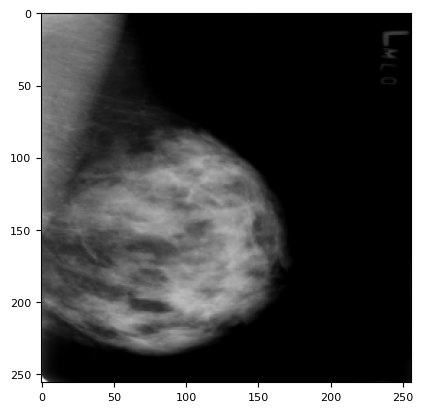

In [19]:
img_resized = cv2.resize(img, (256,256), interpolation=cv2.INTER_AREA)
plt.imshow(img_resized)

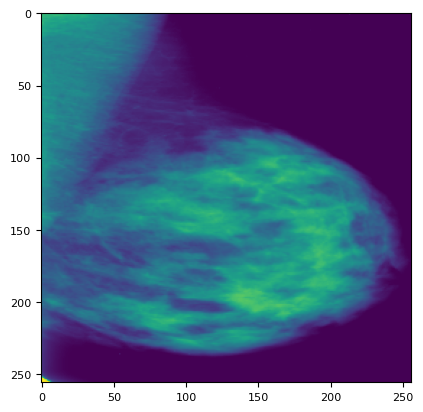

In [20]:
img_resized = cv2.resize(img_cropped, (256,256), interpolation=cv2.INTER_AREA)
plt.imshow(img_resized)

In [21]:
img = img[:,:,0].squeeze()

In [24]:
h,w = img.shape
p = h-w
lp = p // 2
rp = p // 2
if lp + rp < p:
    lp += 1

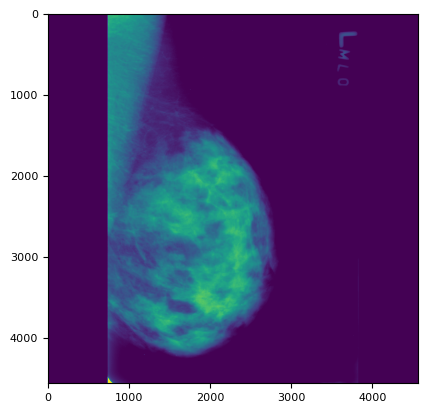

In [25]:
img_p = cv2.copyMakeBorder(img, 0, 0, lp, rp, cv2.BORDER_CONSTANT, value=0)
plt.imshow(img_p)

In [26]:
img_p.shape

(4560, 4560)

(256, 256)

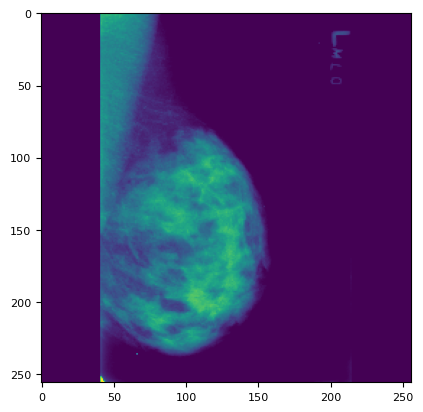

In [27]:
img_r = cv2.resize(img_p, (256,256))
plt.imshow(img_r)
img_r.shape